# This block of code is about presenting some analysis we run on the BTC transactions data

we are going to see:

1. hourly bitcoin transactions
2. correletion between btc and snp
3. daily bitcoin transactions
4. correletion between btc and snp


Install requierments

In [4]:
!pip install yfinance

In [5]:
from tqdm.autonotebook import tqdm
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import yfinance as yf

Get the top 20 most volumed transactions

In [6]:
# List of top 20 cryptocurrency symbols as they appear on Yahoo Finance
symbols = [
    "BTC-USD", "^GSPC", "^DJI", "^IXIC", "GLD"
]

# Dataset 1 - Daily transaction

Fetch 730 since this is the limit of yfinance

In [7]:
last_730_days = datetime.now() - timedelta(days=729)

In [8]:
last_730_days

datetime.datetime(2022, 5, 1, 14, 35, 55, 986925)

In [9]:
# Start date for fetching data
end_date = datetime.strftime(last_730_days, '%Y-%m-%d')
# DataFrame to store all the data
all_data = pd.DataFrame()

for coin in symbols:
    print(f"Fetching data for {coin}")
    data = yf.download(coin, start=end_date, interval="1h")
    data['Symbol'] = coin  # Add a column for the symbol
    all_data = pd.concat([all_data, data])

Fetching data for BTC-USD


[*********************100%%**********************]  1 of 1 completed


Fetching data for ^GSPC


[*********************100%%**********************]  1 of 1 completed


Fetching data for ^DJI


[*********************100%%**********************]  1 of 1 completed


Fetching data for ^IXIC


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Fetching data for GLD


In [10]:
# Reset index to handle the concatenation
all_data.reset_index(inplace=True)

# Save to CSV (optional)
all_data.to_csv("hourly.csv", index=False)

print("Data fetching complete.")


Data fetching complete.


In [11]:
all_data = pd.read_csv("hourly.csv")

In [12]:
all_data

,Datetime,Open,High,Low,Close,Adj Close,Volume,Symbol
0,2022-05-01 00:00:00+00:00,37704.460938,37802.847656,37674.144531,37733.203125,37733.203125,0,BTC-USD
1,2022-05-01 01:00:00+00:00,37733.964844,37992.093750,37591.007812,37953.527344,37953.527344,1038751744,BTC-USD
2,2022-05-01 02:00:00+00:00,37938.640625,38031.140625,37841.062500,37841.062500,37841.062500,175978496,BTC-USD
3,2022-05-01 03:00:00+00:00,37841.746094,38049.117188,37841.746094,38046.710938,38046.710938,279838720,BTC-USD
4,2022-05-01 04:00:00+00:00,38049.445312,38064.761719,37938.535156,37939.511719,37939.511719,148811776,BTC-USD
...,...,...,...,...,...,...,...,...
31381,2024-04-26 13:30:00-04:00,216.184998,216.679993,216.089996,216.679993,216.679993,428183,GLD
31382,2024-04-26 14:30:00-04:00,216.679993,216.719894,216.240005,216.440002,216.440002,489185,GLD
31383,2024-04-26 15:30:00-04:00,216.440002,216.630005,216.324997,216.589996,216.589996,823625,GLD
31384,2024-04-29 09:30:00-04:00,216.085999,216.490005,215.250000,216.470001,216.470001,1276949,GLD


# Extract data From Dataset

In [13]:
data_by_symbol = lambda symbol: all_data[all_data['Symbol'] == symbol]

In [14]:
btc = data_by_symbol('BTC-USD')
dow = data_by_symbol('^DJI')
snp = data_by_symbol('^GSPC')
nasdaq = data_by_symbol('^IXIC')
gold = data_by_symbol('GLD')

In [15]:
 btc

,Datetime,Open,High,Low,Close,Adj Close,Volume,Symbol
0,2022-05-01 00:00:00+00:00,37704.460938,37802.847656,37674.144531,37733.203125,37733.203125,0,BTC-USD
1,2022-05-01 01:00:00+00:00,37733.964844,37992.093750,37591.007812,37953.527344,37953.527344,1038751744,BTC-USD
2,2022-05-01 02:00:00+00:00,37938.640625,38031.140625,37841.062500,37841.062500,37841.062500,175978496,BTC-USD
3,2022-05-01 03:00:00+00:00,37841.746094,38049.117188,37841.746094,38046.710938,38046.710938,279838720,BTC-USD
4,2022-05-01 04:00:00+00:00,38049.445312,38064.761719,37938.535156,37939.511719,37939.511719,148811776,BTC-USD
...,...,...,...,...,...,...,...,...
17422,2024-04-29 10:00:00+00:00,62523.800781,62668.964844,62397.039062,62422.210938,62422.210938,28047360,BTC-USD
17423,2024-04-29 11:00:00+00:00,62397.925781,62415.753906,62199.332031,62258.082031,62258.082031,369973248,BTC-USD
17424,2024-04-29 12:00:00+00:00,62254.503906,62617.441406,62085.191406,62609.511719,62609.511719,582434816,BTC-USD
17425,2024-04-29 13:00:00+00:00,62579.144531,62657.734375,61826.671875,61974.937500,61974.937500,1157912576,BTC-USD


# 1. Hourly Trend

BTC corr Other indexes - hourly

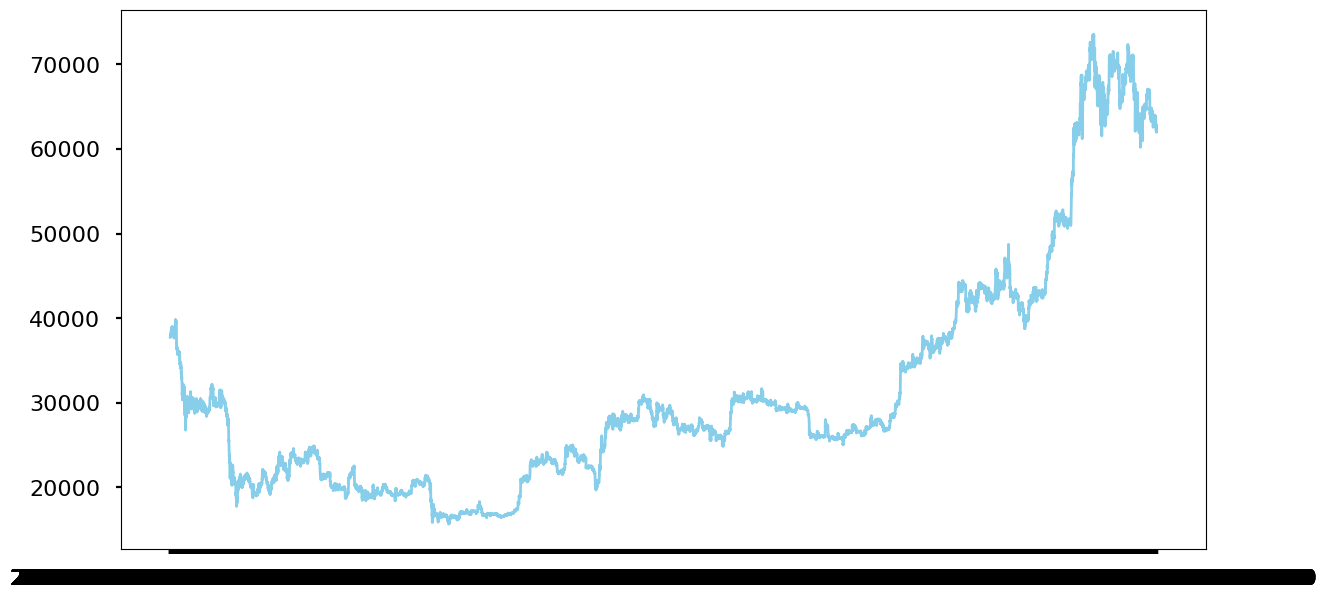

In [16]:
import matplotlib.pyplot as plt


df = all_data.copy()
# Plotting
plt.figure(figsize=(14, 7))
plt.plot(btc['Datetime'], btc['Close'], label='Bitcoin', marker='', color='skyblue', linewidth=2)
# plt.plot(dow['Datetime'], dow['Close'], label='Dow Jones', marker='', color='olive', linewidth=2)
# plt.plot(nasdaq['Datetime'], nasdaq['Close'], label='Nasdaq', marker='', color='gold', linewidth=2)
# plt.plot(snp['Datetime'], snp['Close'], label='S&P 500', marker='', color='purple', linewidth=2)


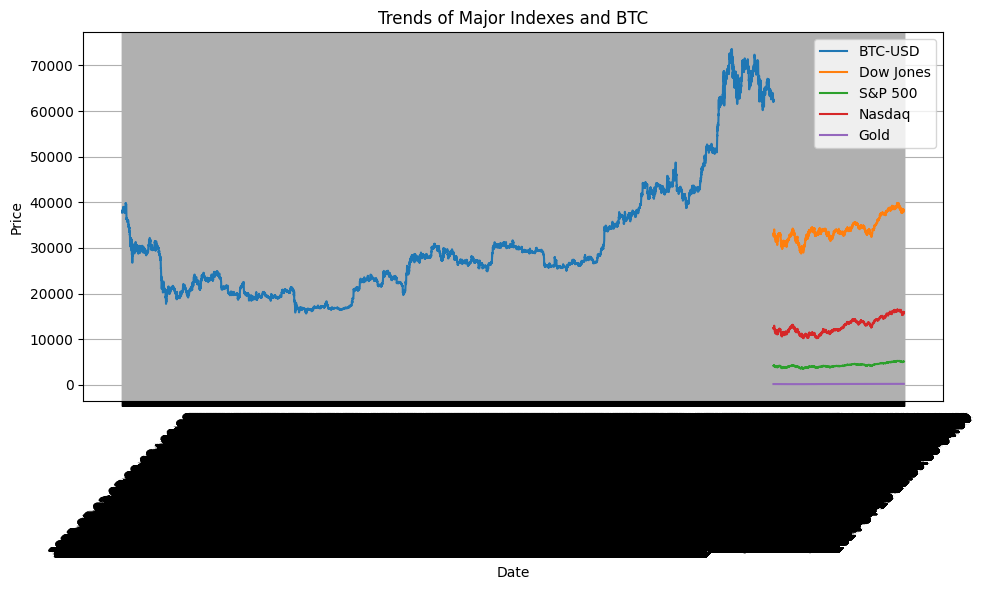

In [21]:
# Plotting the data
plt.figure(figsize=(10, 6))

# Plot Bitcoin (BTC)
plt.plot(btc['Datetime'], btc['Close'], label='BTC-USD')

# Plot major indexes
plt.plot(dow['Datetime'], dow['Close'], label='Dow Jones')
plt.plot(snp['Datetime'], snp['Close'], label='S&P 500')
plt.plot(nasdaq['Datetime'], nasdaq['Close'], label='Nasdaq')
plt.plot(gold['Datetime'], gold['Close'], label='Gold')


# Adding labels and legend
plt.title('Trends of Major Indexes and BTC')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

# Dataset 2 - daily btc transaction

In [17]:
# Start date for fetching data
start_date = '2014-09-17'  # Adjust as needed, keeping in mind the availability of data
# DataFrame to store all the data
all_data = pd.DataFrame()

for coin in symbols:
    print(f"Fetching data for {coin}")
    data = yf.download(coin, start=start_date, interval="1d")
    data['Symbol'] = coin  # Add a column for the symbol
    all_data = pd.concat([all_data, data])

Fetching data for BTC-USD


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Fetching data for ^GSPC
Fetching data for ^DJI


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


Fetching data for ^IXIC
Fetching data for GLD


[*********************100%%**********************]  1 of 1 completed


In [18]:
all_data

,Open,High,Low,Close,Adj Close,Volume,Symbol
Date,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,BTC-USD
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,BTC-USD
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,BTC-USD
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,BTC-USD
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,BTC-USD
...,...,...,...,...,...,...,...
2024-04-23,213.960007,215.860001,213.869995,215.039993,215.039993,10730300,GLD
2024-04-24,214.759995,216.350006,214.360001,214.639999,214.639999,5741100,GLD
2024-04-25,214.470001,217.050003,214.339996,215.919998,215.919998,6606500,GLD


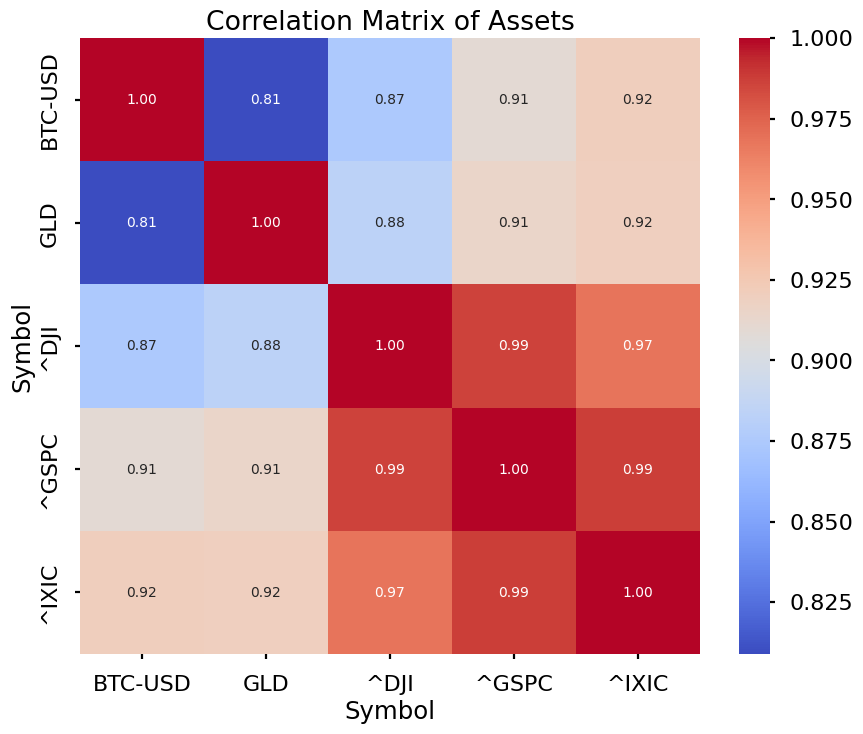

In [19]:
assets = ["BTC-USD", "^DJI", "^GSPC", "^IXIC", "GLD"]
filtered_df = all_data[all_data['Symbol'].isin(assets)]

# Pivot the DataFrame to have 'Symbol' as columns and 'Close' as values
pivot_df = filtered_df.pivot(columns='Symbol', values='Close')

# Calculate the correlation matrix
correlation_matrix = pivot_df.corr()

# Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Assets')
plt.show()

# Extract Bitcoin From Dataset

In [20]:
# Reset index to handle the concatenation
all_data.reset_index(inplace=True)

# Save to CSV (optional)
all_data.to_csv("daily.csv", index=False)

In [21]:
all_data = all_data = pd.read_csv("daily.csv")

In [22]:
btc = data_by_symbol('BTC-USD')
dow = data_by_symbol('^DJI')
snp = data_by_symbol('^GSPC')
nasdaq = data_by_symbol('^IXIC')
gold = data_by_symbol('^GLD')

In [23]:
btc

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,BTC-USD
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,BTC-USD
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,BTC-USD
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,BTC-USD
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,BTC-USD
...,...,...,...,...,...,...,...,...
3508,2024-04-25,64275.019531,65275.207031,62783.632812,64481.707031,64481.707031,32155786816,BTC-USD
3509,2024-04-26,64485.371094,64789.656250,63322.398438,63755.320312,63755.320312,24139372950,BTC-USD
3510,2024-04-27,63750.988281,63898.363281,62424.718750,63419.140625,63419.140625,19530783039,BTC-USD
3511,2024-04-28,63423.515625,64321.484375,62793.597656,63113.230469,63113.230469,17334827993,BTC-USD


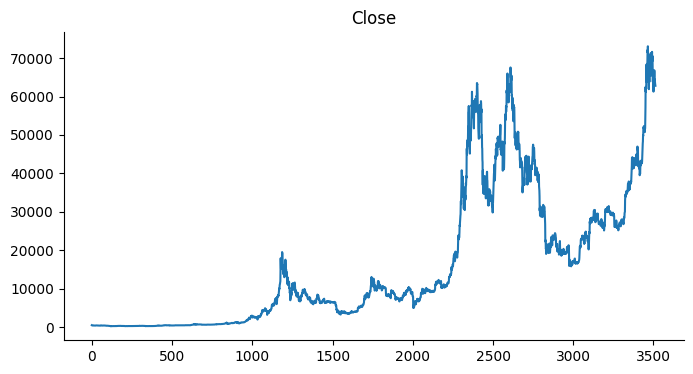

In [29]:
# @title Close

from matplotlib import pyplot as plt
btc['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

BTC corr Other indexes - daily

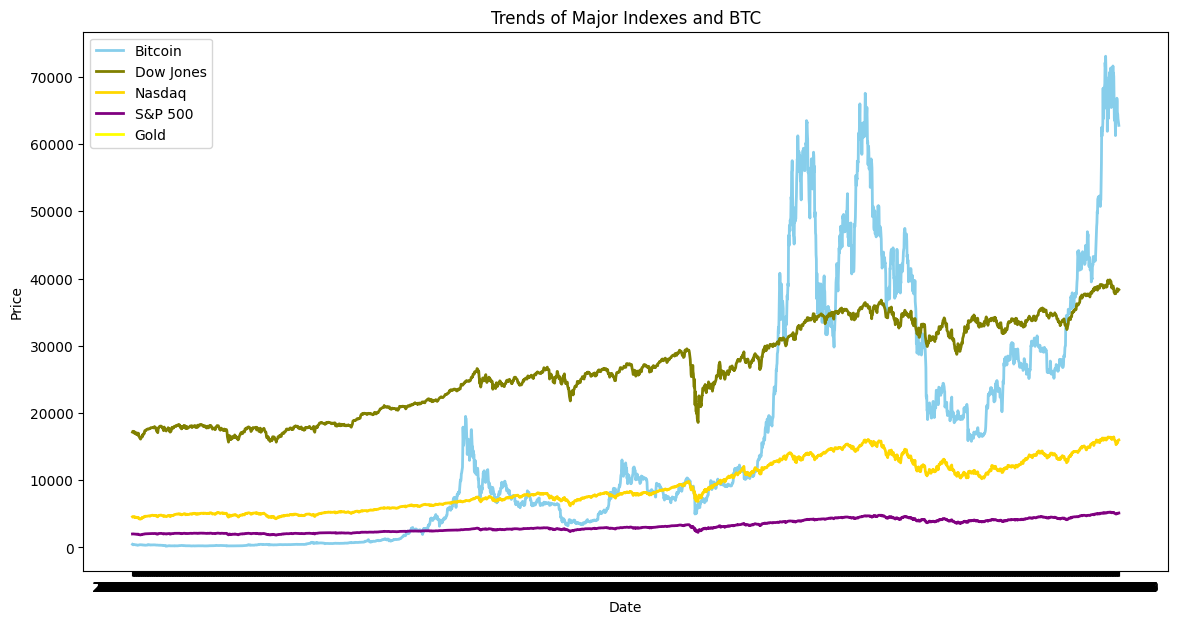

In [30]:
df = all_data.copy()
# Plotting
plt.figure(figsize=(14, 7))
plt.plot(btc['Date'], btc['Close'], label='Bitcoin', marker='', color='skyblue', linewidth=2)
plt.plot(dow['Date'], dow['Close'], label='Dow Jones', marker='', color='olive', linewidth=2)
plt.plot(nasdaq['Date'], nasdaq['Close'], label='Nasdaq', marker='', color='gold', linewidth=2)
plt.plot(snp['Date'], snp['Close'], label='S&P 500', marker='', color='purple', linewidth=2)
plt.plot(gold['Date'], gold['Close'], label='Gold', marker='', color='yellow', linewidth=2)

plt.title('Trends of Major Indexes and BTC')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

plt.show()


# pytrend

**pytrends**

Pytrends is a Python library that provides a simple interface for interacting with Google Trends data. Google Trends allows users to explore the popularity of search terms over time and across different regions.

With pytrends, you can fetch data such as the search interest for specific keywords, trends over time, geographic distribution of searches, related queries, and more. This data can be useful for various purposes, including market research, content planning, and trend analysis.

Pytrends allows you to access Google Trends data programmatically, making it easier to integrate this information into your Python applications, scripts, or data analysis workflows.# New Section

In [31]:
!pip install pytrends
!pip install retrying

In [32]:
import time
from pytrends.request import TrendReq
from retrying import retry

@retry(wait_exponential_multiplier=1000, wait_exponential_max=10000)
def fetch_trends_data():
    pytrends = TrendReq(hl='en-US', tz=360)
    pytrends.build_payload(kw_list=['bitcoin', 'BTC'], timeframe='2014-09-17 today')
    return pytrends.interest_over_time()

try:
    interest_over_time_df = fetch_trends_data()
    print(interest_over_time_df.head())
except Exception as e:
    print(f"An error occurred: {e}")

KeyboardInterrupt: 

In [ ]:
interest_over_time_df

# ARIMA

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product
from datetime import datetime
warnings.filterwarnings('ignore')
plt.style.use('seaborn-poster')

In [25]:
btc

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,BTC-USD
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,BTC-USD
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,BTC-USD
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,BTC-USD
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,BTC-USD
...,...,...,...,...,...,...,...,...
3508,2024-04-25,64275.019531,65275.207031,62783.632812,64481.707031,64481.707031,32155786816,BTC-USD
3509,2024-04-26,64485.371094,64789.656250,63322.398438,63755.320312,63755.320312,24139372950,BTC-USD
3510,2024-04-27,63750.988281,63898.363281,62424.718750,63419.140625,63419.140625,19530783039,BTC-USD
3511,2024-04-28,63423.515625,64321.484375,62793.597656,63113.230469,63113.230469,17334827993,BTC-USD


In [26]:
btc['Date'] = pd.to_datetime(btc['Date'])

btc.drop(columns=['Symbol'], inplace=True)

btc.set_index('Date', inplace=True)

btc_daily = btc.resample('D').mean()
btc_monthly = btc.resample('M').mean()
btc_yearly = btc.resample('A-DEC').mean()
btc_quarterly = btc.resample('Q-DEC').mean()

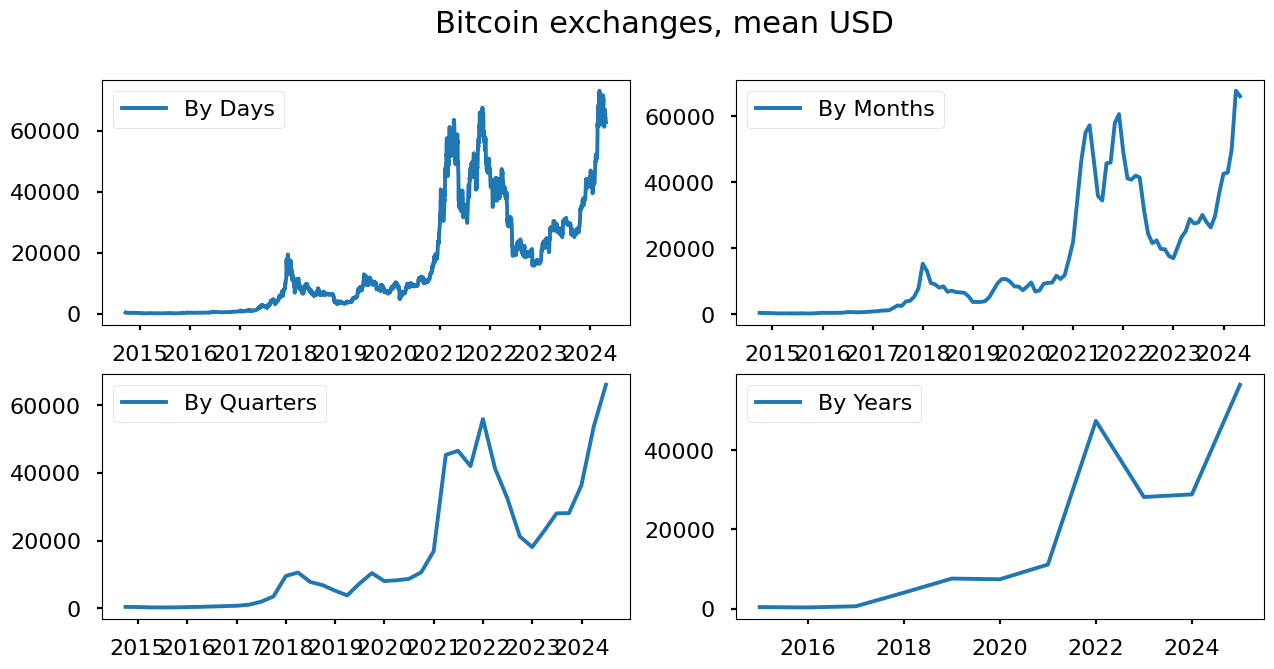

In [27]:
fig = plt.figure(figsize=[15, 7])
plt.suptitle('Bitcoin exchanges, mean USD', fontsize=22)

plt.subplot(221)
plt.plot(btc_daily.Close, '-', label='By Days')
plt.legend()

plt.subplot(222)
plt.plot(btc_monthly.Close, '-', label='By Months')
plt.legend()

plt.subplot(223)
plt.plot(btc_quarterly.Close, '-', label='By Quarters')
plt.legend()

plt.subplot(224)
plt.plot(btc_yearly.Close, '-', label='By Years')
plt.legend()

# plt.tight_layout()
plt.show()

As for now, We will predict bitcoin price by months.

**Stationarity check and STL-decomposition of the series**

Dickey–Fuller test: p=0.841174


<Figure size 1500x700 with 0 Axes>

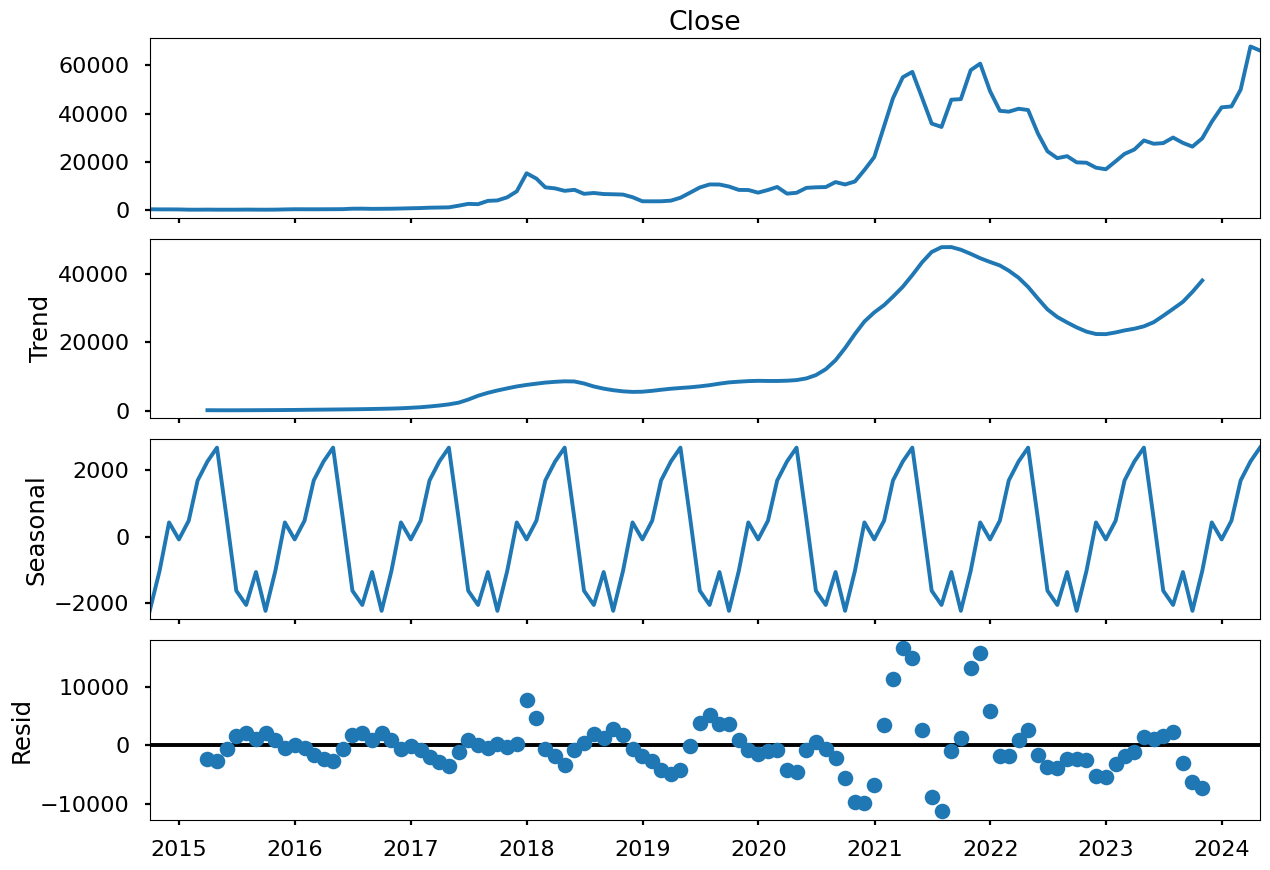

In [28]:
plt.figure(figsize=[15,7])
sm.tsa.seasonal_decompose(btc_monthly.Close).plot()
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(btc_monthly.Close)[1])
plt.show()

The series are not stationary.

**Box-Cox Transformations**

In [29]:
btc_monthly['Price_box'], lmbda = stats.boxcox(btc_monthly.Close)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(btc_monthly.Close)[1])

Dickey–Fuller test: p=0.841174


The series are not stationary.

**Seasonal differentiation**

In [30]:
btc_monthly['prices_box_diff'] = btc_monthly.Price_box - btc_monthly.Price_box.shift(12)
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(btc_monthly.prices_box_diff[12:])[1])

Dickey–Fuller test: p=0.229357



The series are not stationary.


**Regular differentiation**

Dickey–Fuller test: p=0.000092


<Figure size 1500x700 with 0 Axes>

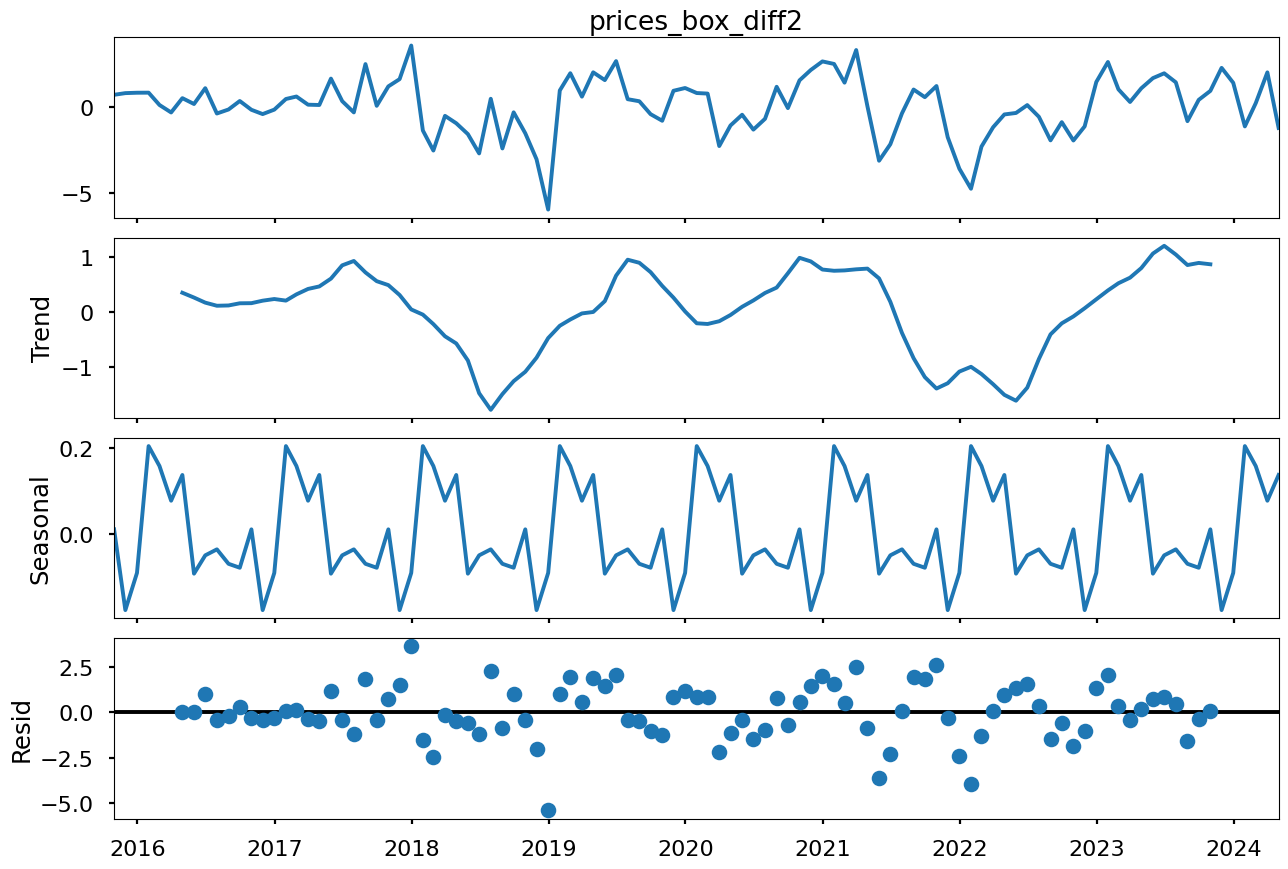

In [31]:
btc_monthly['prices_box_diff2'] = btc_monthly.prices_box_diff - btc_monthly.prices_box_diff.shift(1)
plt.figure(figsize=(15,7))

# STL-decomposition
sm.tsa.seasonal_decompose(btc_monthly.prices_box_diff2[13:]).plot()
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(btc_monthly.prices_box_diff2[13:])[1])

plt.show()

The series are stationary.

**Model Selection**

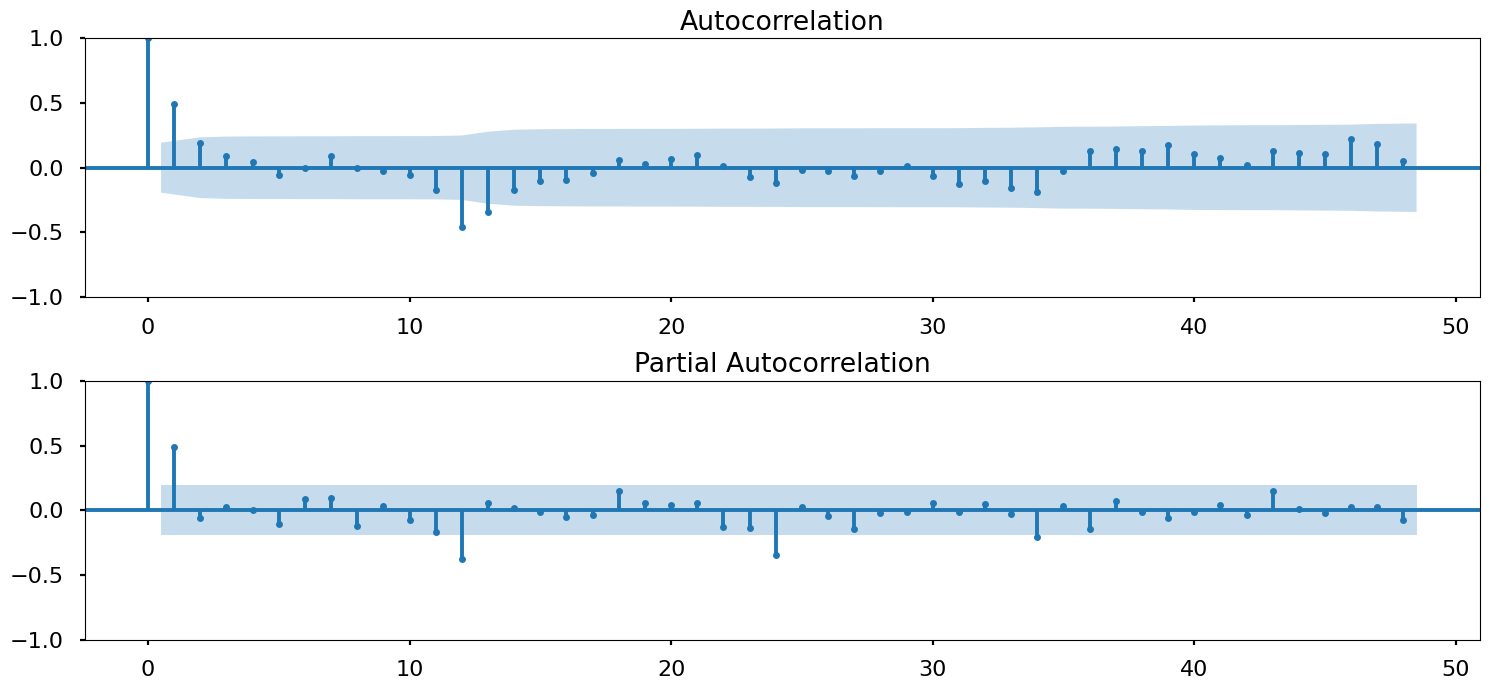

In [32]:
plt.figure(figsize=(15,7))
ax = plt.subplot(211)
sm.graphics.tsa.plot_acf(btc_monthly.prices_box_diff2[13:].values.squeeze(), lags=48, ax=ax)
ax = plt.subplot(212)
sm.graphics.tsa.plot_pacf(btc_monthly.prices_box_diff2[13:].values.squeeze(), lags=48, ax=ax)
plt.tight_layout()
plt.show()

In [33]:
# Initial approximation of parameters
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)


# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(btc_monthly.Price_box, order=(param[0], d, param[1]),
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    except ValueError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [34]:
# Best Models
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters         aic
7   (0, 1, 0, 1)  329.649106
19  (1, 0, 0, 1)  329.852208
25  (1, 1, 0, 1)  330.822448
13  (0, 2, 0, 1)  330.960289
37  (2, 0, 0, 1)  330.999578
                                     SARIMAX Results                                      
Dep. Variable:                          Price_box   No. Observations:                  116
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -161.825
Date:                            Mon, 29 Apr 2024   AIC                            329.649
Time:                                    14:44:07   BIC                            337.553
Sample:                                09-30-2014   HQIC                           332.851
                                     - 04-30-2024                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------------

**Analysis of residues**

Dickey–Fuller test:: p=0.000000


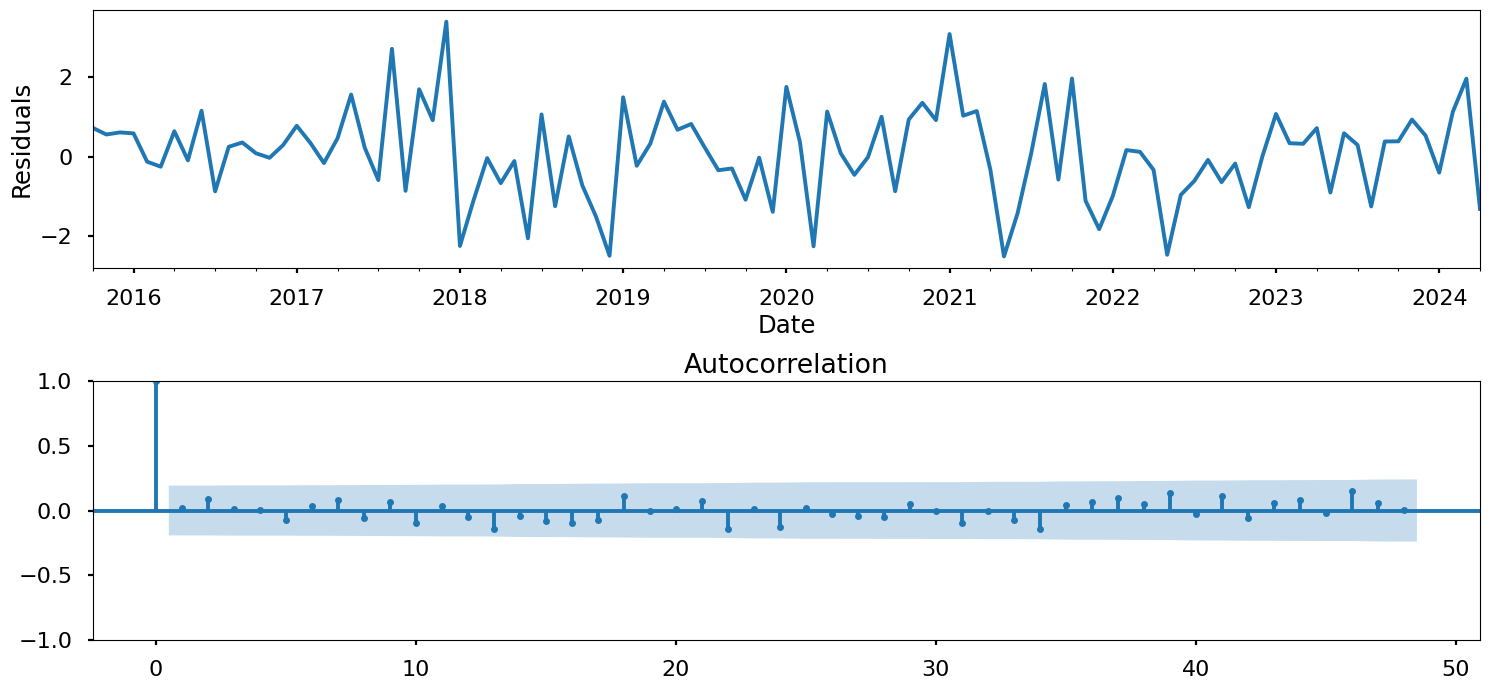

In [35]:
# STL-decomposition
plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid[13:].plot()
plt.ylabel(u'Residuals')
ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid[13:].values.squeeze(), lags=48, ax=ax)

print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

plt.tight_layout()
plt.show()

**Prediction**

In [36]:
# Inverse Box-Cox Transformation Function
def invboxcox(y,lmbda):
   if lmbda == 0:
      return(np.exp(y))
   else:
      return(np.exp(np.log(lmbda*y+1)/lmbda))

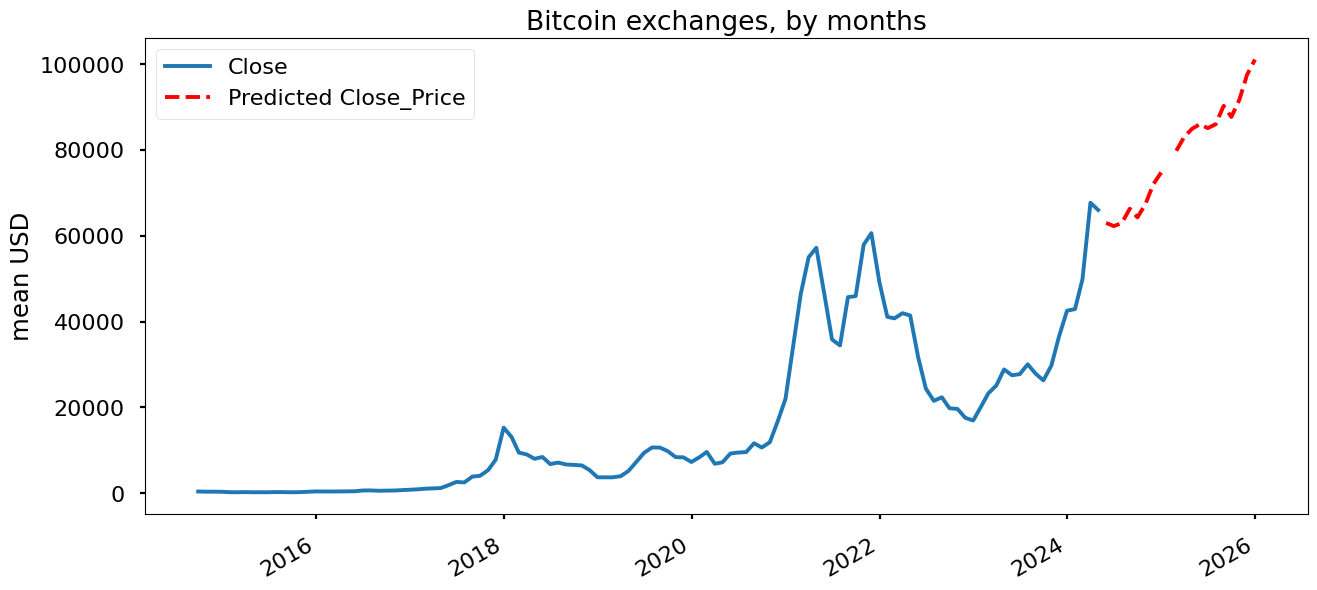

In [59]:
# Prediction
df_month2 = btc_monthly[['Close']]
date_list = [datetime(2024, 4, 30), datetime(2024, 5, 31), datetime(2024, 6, 30), datetime(2024, 7, 31),
             datetime(2024, 8, 31), datetime(2024, 9, 30), datetime(2024, 10, 31), datetime(2024, 11, 30),
             datetime(2024, 12, 31), datetime(2025, 1, 1),datetime(2025, 2, 28), datetime(2025, 3, 31), datetime(2025, 4, 30),
             datetime(2025, 5, 31),datetime(2025, 6, 30),datetime(2025, 7, 31),datetime(2025, 8, 31),datetime(2025, 9, 30),
             datetime(2025, 10, 31), datetime(2025, 11, 30), datetime(2025, 12, 31)]
future = pd.DataFrame(index=date_list, columns=btc_monthly.columns)
df_month2 = pd.concat([btc_monthly, future])

# Forecast future values using the fitted model
df_month2['forecast'] = best_model.forecast(steps=len(future))

# Apply inverse Box-Cox transformation if applicable
df_month2['forecast'] = invboxcox(df_month2['forecast'], lmbda)

# Plot the results
plt.figure(figsize=(15,7))
df_month2['Close'].plot()
df_month2['forecast'].plot(color='r', ls='--', label='Predicted Close_Price')
plt.legend()
plt.title('Bitcoin exchanges, by months')
plt.ylabel('mean USD')
plt.show()

In [63]:
df_month2

,Open,High,Low,Close,Adj Close,Volume,Price_box,prices_box_diff,prices_box_diff2,forecast
2014-09-30,412.654003,421.104422,398.174641,407.182428,407.182428,2.934864e+07,11.367862,NaN,NaN,NaN
2014-10-31,365.748000,374.314260,354.856645,364.148873,364.148873,2.912885e+07,11.014166,NaN,NaN,NaN
2014-11-30,364.850235,376.494235,357.241831,366.099799,366.099799,2.199111e+07,11.030912,NaN,NaN,NaN
2014-12-31,343.074836,347.487129,336.565775,341.267871,341.267871,1.784201e+07,10.812160,NaN,NaN,NaN
2015-01-31,251.799905,261.391583,240.495550,248.782547,248.782547,3.544555e+07,9.863722,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2025-08-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90289.993050
2025-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87710.477978
2025-10-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91689.387485
2025-11-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97524.431533


In [66]:
def get_predicted_price_by_date(df, date):
    # Convert the date string to datetime format
    date = pd.to_datetime(date)

    # Check if the date exists in the DataFrame index
    if date in df.index:
        # Extract the predicted price for the selected date
        predicted_price = df.loc[date, 'forecast']
        return predicted_price
    else:
        print(f"No prediction available for the date {date}.")
        return None

# Example usage:
selected_date = '2025-11-30'
predicted_price = get_predicted_price_by_date(df_month2, selected_date)
print(f"Predicted Bitcoin price on {selected_date}: {predicted_price}")

Predicted Bitcoin price on 2025-11-30: 97524.43153253708


# LSTM

Setting Up the Environment

In [67]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

Data Preprocessing

In [68]:
closing_prices = btc['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
closing_prices_scaled = scaler.fit_transform(closing_prices)

LSTM Model Creation and Training

In [69]:
# Define the prepare_data function
def prepare_data(data, n_steps):
    x, y = [], []
    for i in range(len(data) - n_steps):
        x.append(data[i:(i + n_steps), 0])
        y.append(data[i + n_steps, 0])
    return np.array(x), np.array(y)

def create_lstm_model(input_shape):
    """
    Create and compile an LSTM model for time series prediction.

    Parameters:
    - input_shape (tuple): Shape of the input data in the form (time_steps, features).

    Returns:
    - model (Sequential): Compiled LSTM model.
    """
    model = Sequential()
    # Add the first LSTM layer with 50 units and return sequences for the next layer
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    # Add the second LSTM layer with 50 units
    model.add(LSTM(units=50))
    # Add a Dense layer with 1 unit for regression
    model.add(Dense(units=1))

    # Compile the model using the Adam optimizer and Mean Squared Error loss
    model.compile(optimizer='adam', loss='mean_squared_error')

    return model


# Code snippet for creating and training the LSTM model
n_steps = 60

# Prepare the training data using the defined function
x_train, y_train = prepare_data(closing_prices_scaled, n_steps)

# Reshape the input data to fit the LSTM model
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Create an instance of the LSTM model
model = create_lstm_model((x_train.shape[1], 1))

# Train the model on the training data
model.fit(x_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
108/108 [==============================] - 22s 104ms/step - loss: 0.0050
Epoch 2/10
108/108 [==============================] - 6s 53ms/step - loss: 7.8583e-04
Epoch 3/10
108/108 [==============================] - 6s 59ms/step - loss: 7.0714e-04
Epoch 4/10
108/108 [==============================] - 7s 66ms/step - loss: 6.4297e-04
Epoch 5/10
108/108 [==============================] - 11s 97ms/step - loss: 5.8043e-04
Epoch 6/10
108/108 [==============================] - 10s 93ms/step - loss: 4.8723e-04
Epoch 7/10
108/108 [==============================] - 6s 57ms/step - loss: 4.3239e-04
Epoch 8/10
108/108 [==============================] - 9s 81ms/step - loss: 3.8479e-04
Epoch 9/10
108/108 [==============================] - 12s 111ms/step - loss: 3.5229e-04
Epoch 10/10
108/108 [==============================] - 10s 97ms/step - loss: 3.5309e-04


Making Predictions and Evaluation

In [70]:
train_predictions = model.predict(x_train)
train_predictions = scaler.inverse_transform(train_predictions)
mse = mean_squared_error(closing_prices[n_steps:], train_predictions)
print(f'Mean Squared Error on Training Data: {mse}')

108/108 [==============================] - 4s 24ms/step
Mean Squared Error on Training Data: 2147146.4893752118


Visualizing Results

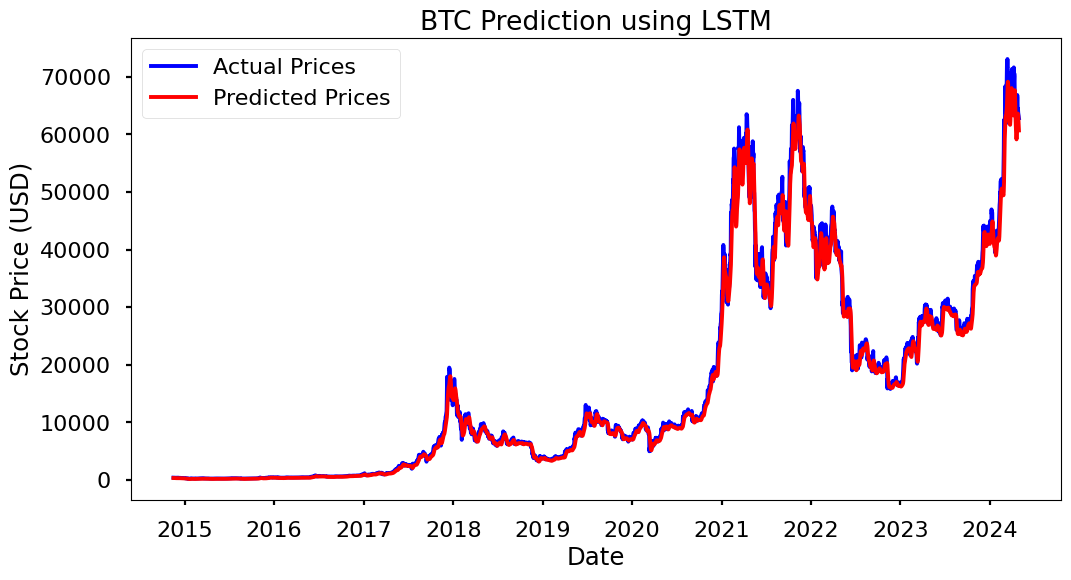

In [73]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(btc.index[n_steps:], closing_prices[n_steps:], label='Actual Prices', color='blue')
plt.plot(btc.index[n_steps:], train_predictions, label='Predicted Prices', color='red')
plt.title('BTC Prediction using LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price (USD)')
plt.legend()
plt.show()